# **Sommaire**

- [Etude de la cible client](#Etude-de-la-cible-client)
- [Import des données](#import-des-donnees)
- [Nettoyage des données](#nettoyage-des-donnees)
- [KPIs](#kpis)
  1. Top 1000 meilleurs films
  2. Acteurs, Réalisateurs, Producteurs et scénaristes qui reviennent plus souvent dans les Top 1000 meilleurs films
  3. Répartion des genres sur les 1000 meilleurs films
  4.Evolution des genres ces 10 dernières années
  5. Répartion Acteurs/Actrices par année sur le top 1000 films
  6. Répartition Hommes & Femmes par genres de film sur le top 1000
  7. Evolution de durée du film entre 1894 et 2023
  8. La durée, la note et la popularité en fonction des genres de films(Pour Top 1000 films)
  9. Note moyenne des catégories
  10. Analyse des 10 genres les mieux notés par période de 1980 à nos jours


## **Etude de la cible client**

**Évolution et structure de la population de la Creuse**

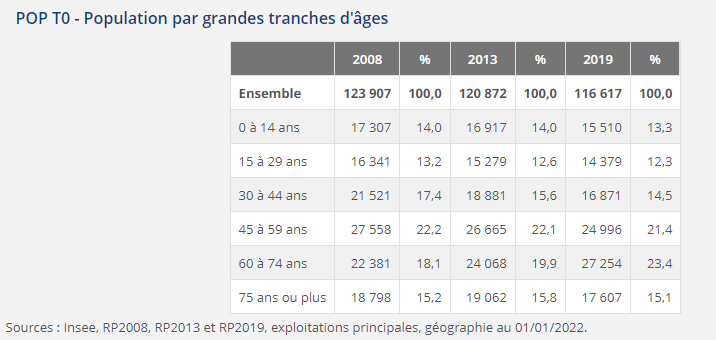

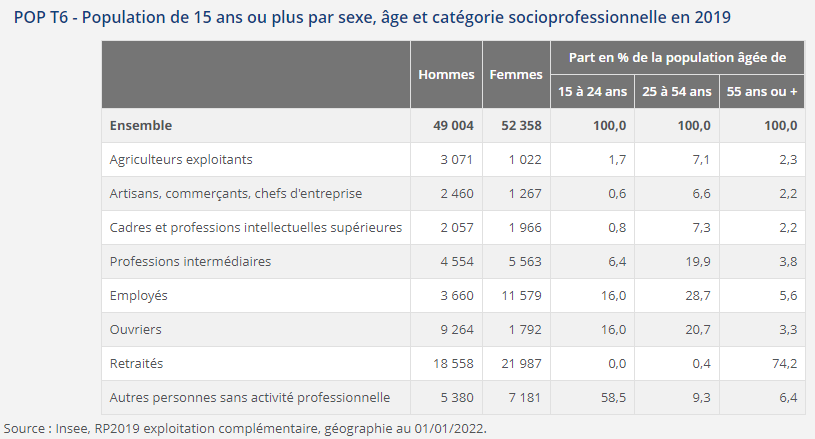

## **Import des données**

In [ ]:
# import des modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

# import des base de données
acteurs = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', sep ='\t', nrows=1000000)
titre = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep = '\t', dtype={'isAdult': str}).query('titleType == "movie"')
real = pd.read_csv('https://datasets.imdbws.com/title.crew.tsv.gz', sep ='\t', nrows=1000000)
distribution = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', sep ='\t', nrows=1000000)
note = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep ='\t')

#**Nettoyage des données**

In [ ]:


# Conversions en valeur numérique
titre['startYear'] = pd.to_numeric(titre['startYear'], errors='coerce')
titre['runtimeMinutes'] = pd.to_numeric(titre['runtimeMinutes'], errors='coerce')

#Filtres
titre = titre[titre['runtimeMinutes'] > 40]
titre = titre[titre['genres'].isin(['Adult','Game-Show','Music','News','Reality-TV','Short','Talk-Show']) == False]

# suppression des '\\N'
titre = titre[titre['genres'] != '\\N']
titre = titre[titre['startYear'] != '\\N']
titre = titre[titre['runtimeMinutes'] != '\\N']

# Création d'une copie de notre df initiale
titre2 = titre.copy()

# Création d'une ligne par genre
titre['genres'] = titre['genres'].apply(lambda x: x.split(','))
titre = titre.explode('genres')


In [ ]:
titre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629809 entries, 8 to 10014682
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          629809 non-null  object 
 1   titleType       629809 non-null  object 
 2   primaryTitle    629809 non-null  object 
 3   originalTitle   629809 non-null  object 
 4   isAdult         629809 non-null  object 
 5   startYear       619747 non-null  float64
 6   endYear         629809 non-null  object 
 7   runtimeMinutes  629809 non-null  float64
 8   genres          629809 non-null  object 
dtypes: float64(2), object(7)
memory usage: 48.1+ MB


#**Filtres sur les films depuis 2010**

In [ ]:
titre_depuis2010 = titre.loc[(titre['startYear'] >= 2010)]

In [ ]:
titre_depuis2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281427 entries, 13082 to 10014682
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          281427 non-null  object 
 1   titleType       281427 non-null  object 
 2   primaryTitle    281427 non-null  object 
 3   originalTitle   281427 non-null  object 
 4   isAdult         281427 non-null  object 
 5   startYear       281427 non-null  float64
 6   endYear         281427 non-null  object 
 7   runtimeMinutes  281427 non-null  float64
 8   genres          281427 non-null  object 
dtypes: float64(2), object(7)
memory usage: 21.5+ MB


#**1. Top 1000 meilleurs films**

**Syntaxe & graphique**

In [ ]:
#TOP 1000 des meilleurs films
moyenne = note['numVotes'].mean()
ecart = note['numVotes'].std()
note['IsPopular'] = note['numVotes'].apply(lambda x: True if x >= moyenne + 2*ecart  else False)
note_titre = pd.merge(titre2, note, on = 'tconst')
best_film = note_titre.loc[note_titre['IsPopular'] == True]
best_film = best_film.sort_values('averageRating', ascending = False)
best_film['rank'] = best_film['numVotes'].rank(ascending = False)
best_film = best_film.loc[best_film['rank'] < 2000]
best_film.reset_index(inplace=True)
best_film = best_film.iloc[0:1000, :]
best_film.head()

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,IsPopular,rank
0,58194,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994.0,\N,142.0,Drama,9.3,2766622,True,1.0
1,34838,tt0068646,movie,The Godfather,The Godfather,0,1972.0,\N,175.0,"Crime,Drama",9.2,1925521,True,10.0
2,22161,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957.0,\N,96.0,"Crime,Drama",9.0,820306,True,105.0
3,72638,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003.0,\N,201.0,"Action,Adventure,Drama",9.0,1898545,True,11.0
4,117828,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008.0,\N,152.0,"Action,Crime,Drama",9.0,2740114,True,2.0


In [ ]:
best_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1000 non-null   int64  
 1   tconst          1000 non-null   object 
 2   titleType       1000 non-null   object 
 3   primaryTitle    1000 non-null   object 
 4   originalTitle   1000 non-null   object 
 5   isAdult         1000 non-null   object 
 6   startYear       1000 non-null   float64
 7   endYear         1000 non-null   object 
 8   runtimeMinutes  1000 non-null   float64
 9   genres          1000 non-null   object 
 10  averageRating   1000 non-null   float64
 11  numVotes        1000 non-null   int64  
 12  IsPopular       1000 non-null   bool   
 13  rank            1000 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 102.7+ KB


**Interprétation de KPI**
* Ce kpi nous sert de base pour sortir les caractéristiques communes aux films les mieux notés.
Ce résultat est nuancé par le nombre de votes de chaque film. Nous constatons qu'il s'agit de films cultes, le genre dramatique revient régulièrement. La durée n'apparait pas comme étant déterminante dans la manière dont les films sont reçus.

#**2. Acteurs, Réalisateurs, Producteurs et scénaristes qui reviennent plus souvent dans les Top 1000 meilleurs films**

**Syntaxe & graphique**

In [ ]:
# Réalisation de jointure
distri_best_film_1000 = pd.merge(best_film, distribution, on = "tconst", how = "left")
acteurs_best_1000 = pd.merge(distri_best_film_1000, acteurs, on = "nconst", how = "inner")
# Groupby les prénoms, category et nombre de films participés
personnage_best_1000 = acteurs_best_1000.groupby(["primaryName","category"])["tconst"].count().sort_values(ascending=False).reset_index(name="nombrefilm")
# Extrait les Top 10 acteurs
top10_acteurs = personnage_best_1000.loc[(personnage_best_1000["category"]=="actor")].nlargest(10, "nombrefilm")
# Extrait les Top 10 actrices
top10_actrices = personnage_best_1000.loc[personnage_best_1000["category"]=="actress"].nlargest(10, "nombrefilm")
# Extrait les Top 10 réalisatuers
top10_réalisateurs = personnage_best_1000.loc[personnage_best_1000["category"]=="director"].nlargest(10, "nombrefilm")

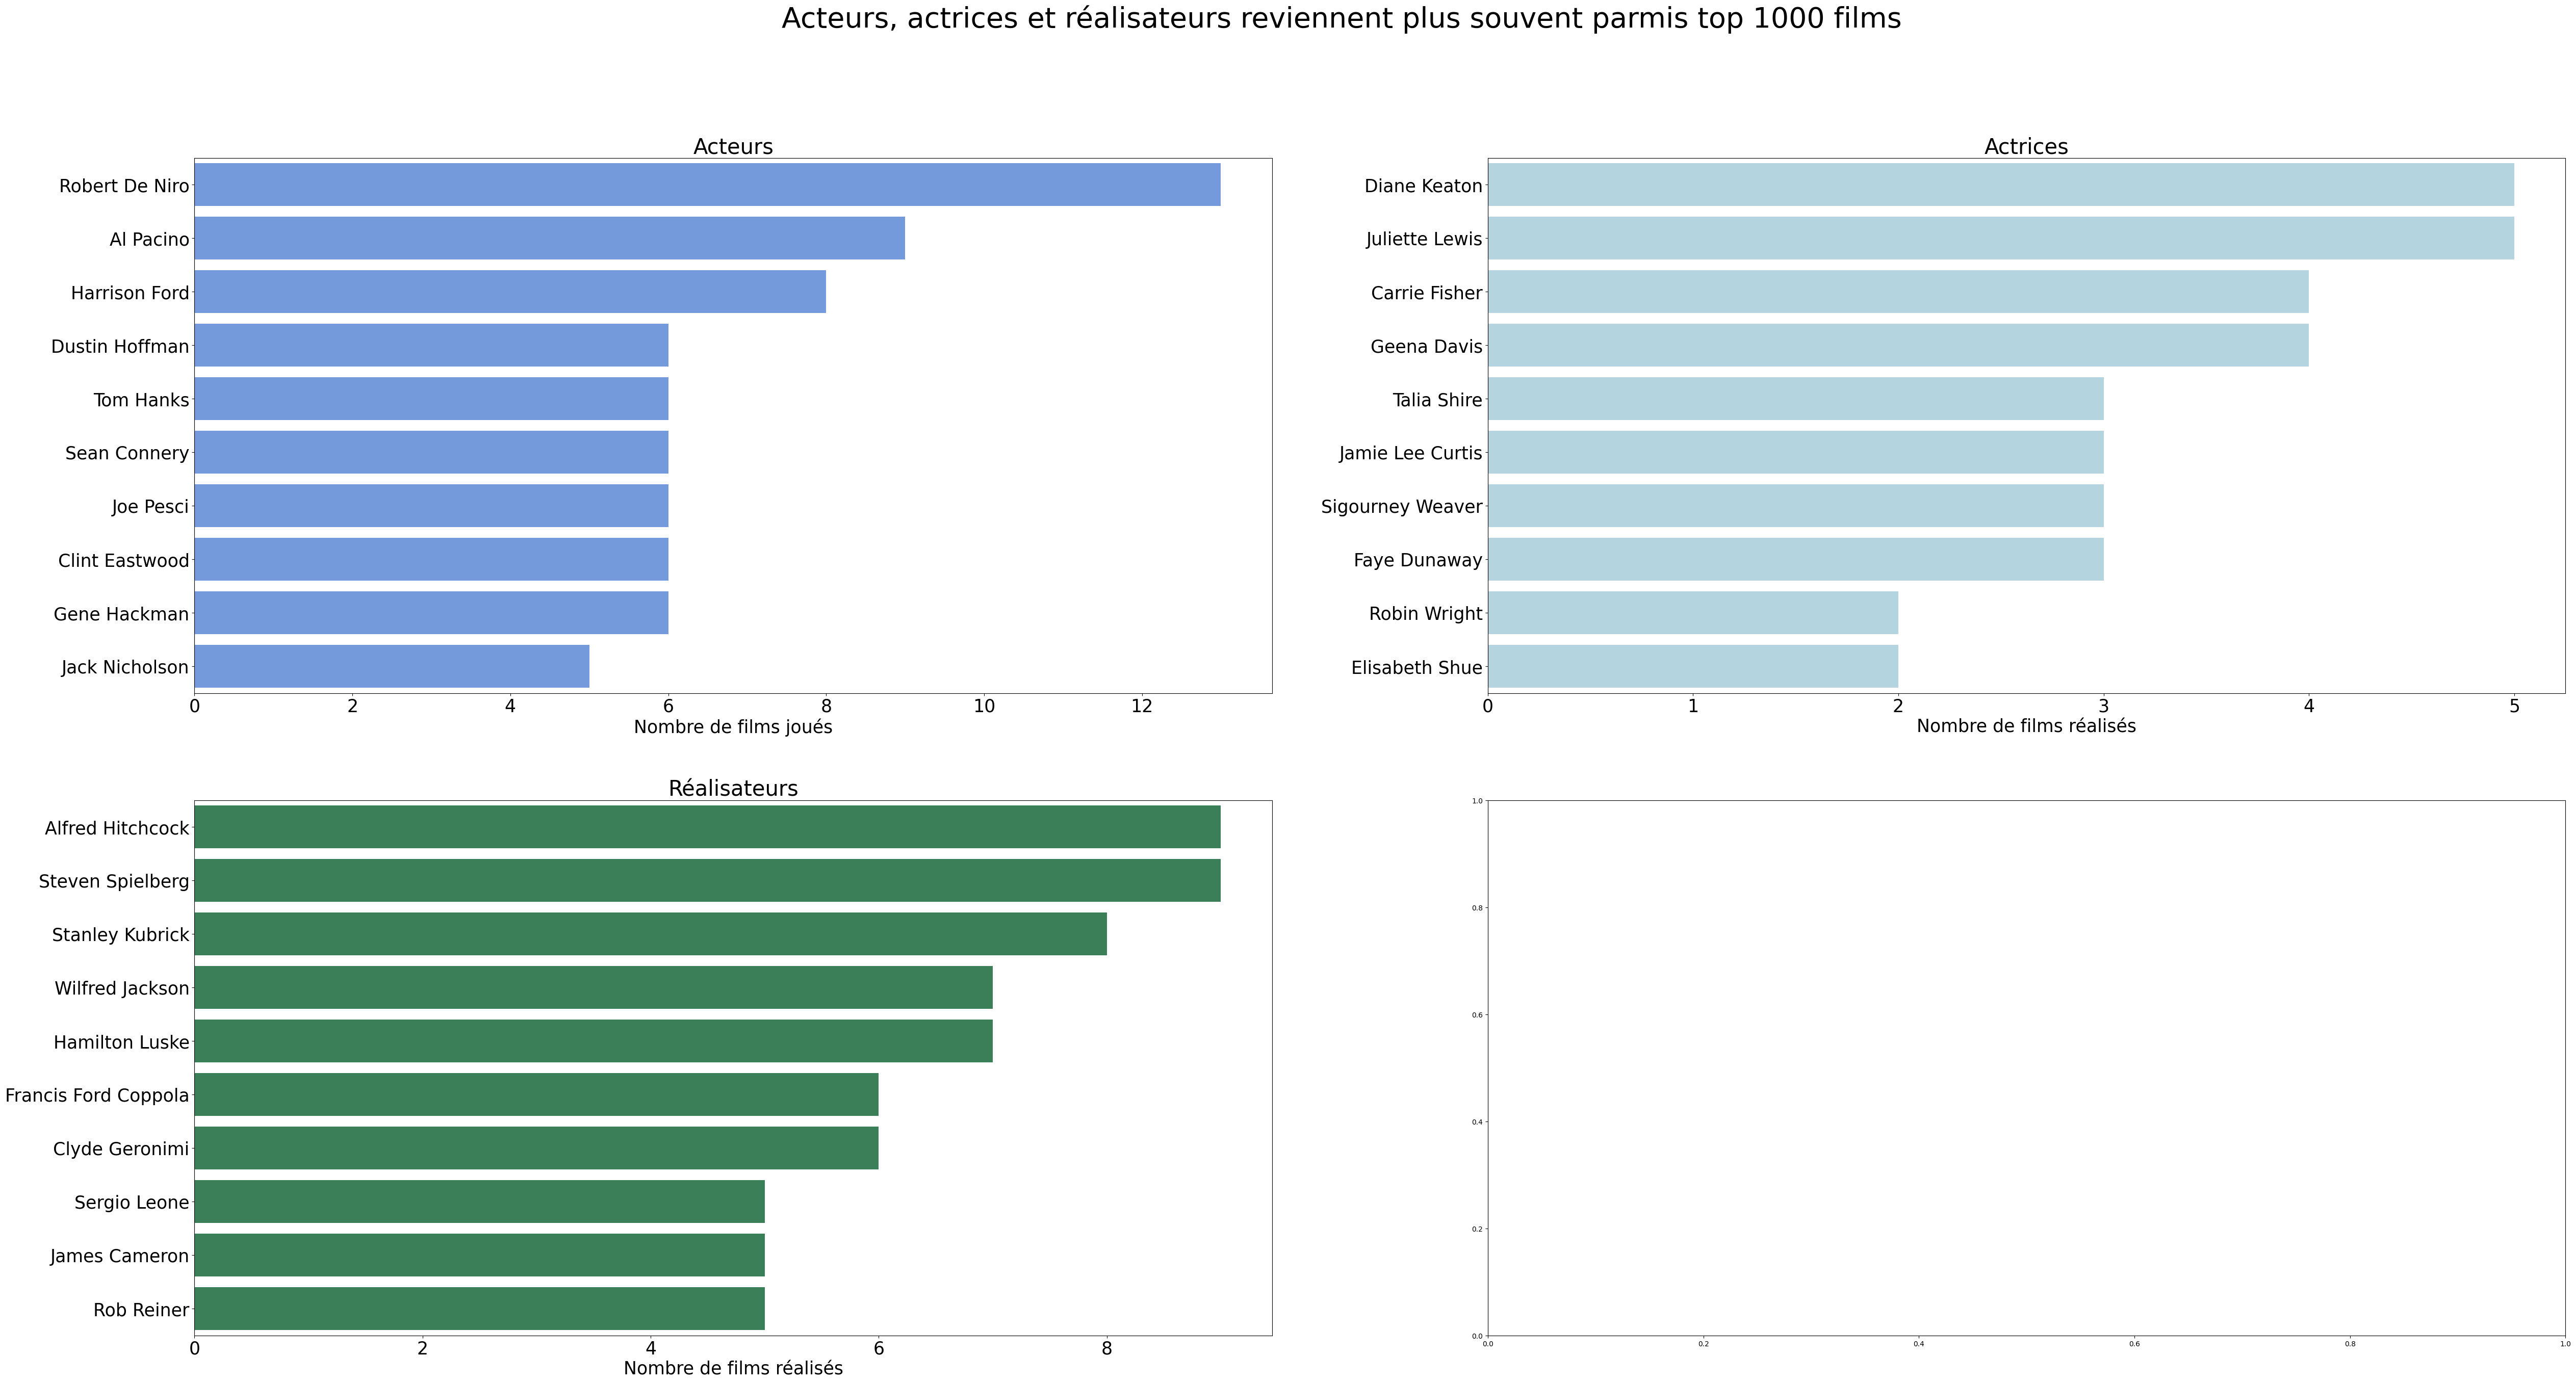

In [ ]:
# Réalisation des graphiques
fig,axes = plt.subplots(2,2, figsize = (60,30))
plt.suptitle("Acteurs, actrices et réalisateurs reviennent plus souvent parmis top 1000 films", size=40)

acteurs_best_1000_film = sns.barplot(ax=axes[0,0], data=top10_acteurs, x="nombrefilm", y="primaryName", color="cornflowerblue")
acteurs_best_1000_film.set_title("Acteurs", size=30)
acteurs_best_1000_film.set_xlabel("Nombre de films joués", size=25)
acteurs_best_1000_film.set_ylabel("")
acteurs_best_1000_film.tick_params(axis='y', labelsize=25)
acteurs_best_1000_film.tick_params(axis='x', labelsize=25)

actrices_best_1000_film = sns.barplot(ax=axes[0,1], data=top10_actrices, x="nombrefilm", y="primaryName", color="lightblue")
actrices_best_1000_film.set_title("Actrices", size=30)
actrices_best_1000_film.set_xlabel("Nombre de films réalisés", size=25)
actrices_best_1000_film.set_ylabel("")
actrices_best_1000_film.tick_params(axis='y', labelsize=25)
actrices_best_1000_film.tick_params(axis='x', labelsize=25)

réalisateurs_best_1000_film = sns.barplot(ax=axes[1,0], data=top10_réalisateurs, x="nombrefilm", y="primaryName", color="seagreen")
réalisateurs_best_1000_film.set_title("Réalisateurs", size=30)
réalisateurs_best_1000_film.set_xlabel("Nombre de films réalisés", size=25)
réalisateurs_best_1000_film.set_ylabel("")
réalisateurs_best_1000_film.tick_params(axis='y', labelsize=25)
réalisateurs_best_1000_film.tick_params(axis='x', labelsize=25)

plt.show()

**Interprétation de KPI**

*   A base de la "popularité" et la "notes moyennes" de films, nous avons extrait les Top 100 meilleurs films dans la base de donnée

*   Nous avons trouvé les Top 10 acteurs, réalisateurs, producteurs et scénaristes qui apparaissent plus souvent dans ces bon films

*   Comme par exemple : pour les acteurs, on a Robert De Niro qui est au premier classement, Harrison Ford qui a joué dans 5 films, au deuxième classment et Al Pacino qui est le troisième








#**3. Répartition des genres sur les 1000 meilleurs films**

**Syntaxe & graphique**

In [ ]:
#Répartition des genres sur le top 1000
best_film_explode = best_film.copy()
best_film_explode['genres'] = best_film_explode['genres'].apply(lambda x: x.split(','))
best_film_explode = best_film_explode.explode('genres')
df_genre_1000 = round(best_film_explode['genres'].value_counts(normalize= True) * 100, 2).reset_index()
df_genre_1000.columns = ['genre', 'percentage']
df_genre_1000.head()

,genre,percentage
0,Drama,23.79
1,Action,10.51
2,Adventure,9.78
3,Comedy,9.71
4,Crime,7.77


In [ ]:
# Groupes de genre apparaissant le plus
best_genres_groups = best_film['genres'].value_counts().reset_index()
best_genres_groups.columns = ['Genre', 'Count']
best_genres_groups = best_genres_groups.loc[:10, :]
best_genres_groups

,Genre,Count
0,Drama,48
1,"Adventure,Animation,Comedy",48
2,"Drama,Romance",31
3,"Comedy,Drama,Romance",31
4,"Action,Adventure,Sci-Fi",30
5,"Crime,Drama,Mystery",28
6,"Crime,Drama,Thriller",27
7,"Action,Crime,Drama",25
8,"Comedy,Drama",25
9,"Crime,Drama",25


In [ ]:
best_genres_groups['Count'].sum()

340

Text(0, 0.5, 'répartition (%)')

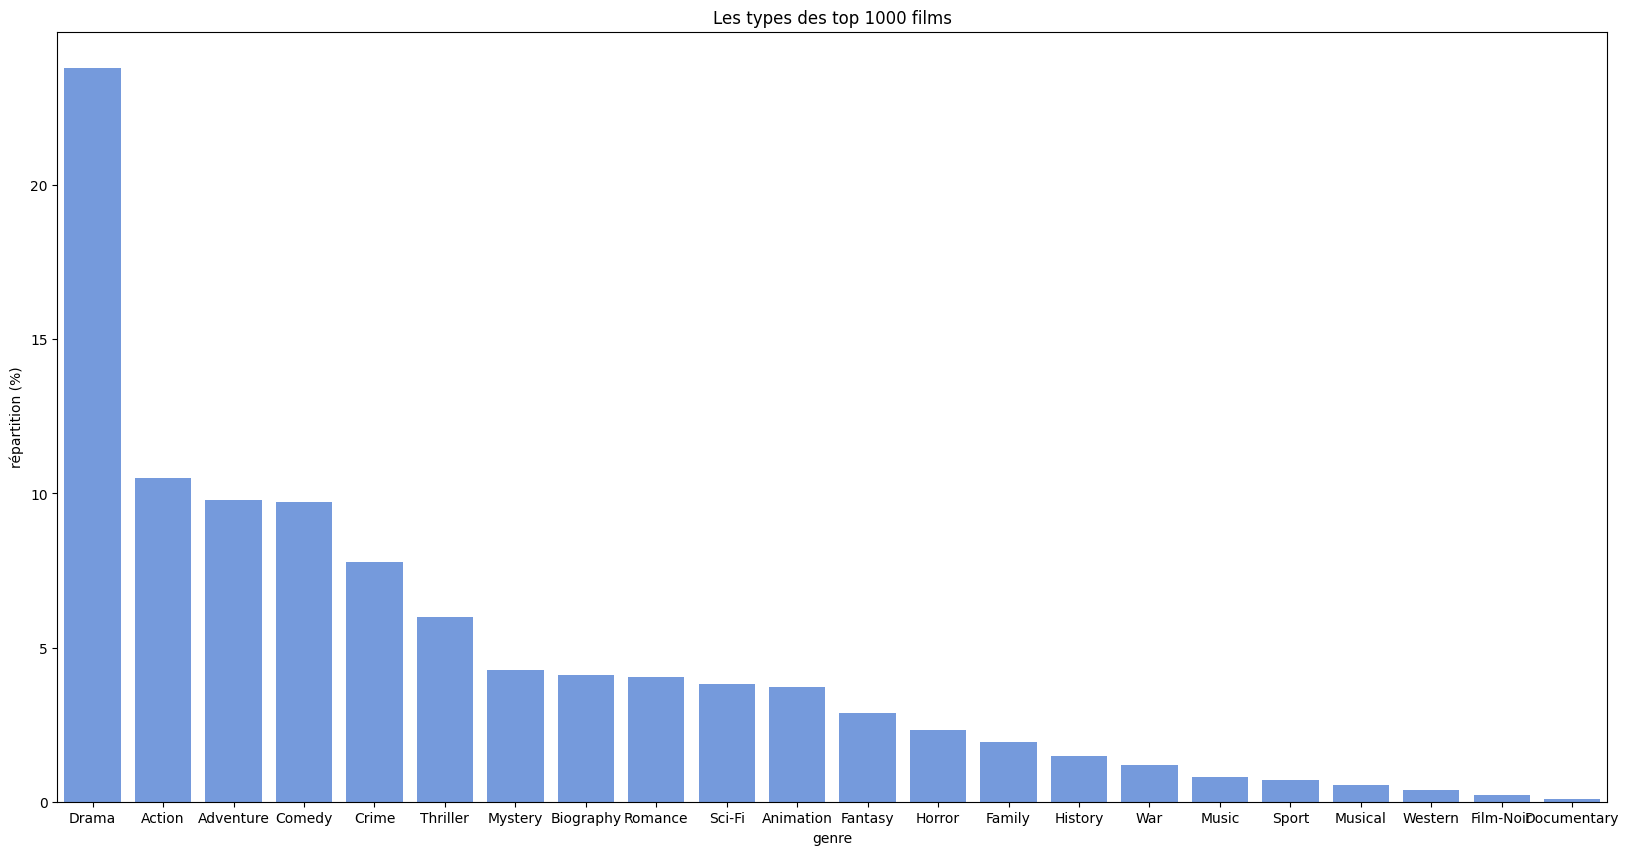

In [ ]:
#Graphique
plt.figure(figsize=(20, 10))
repartition = sns.barplot(data=df_genre_1000, x = "genre", y = "percentage", color = 'cornflowerblue')
repartition.set_title("Les types des top 1000 films")
repartition.set_ylabel("répartition (%)")

**Interprétation de KPI**


*   Dans les 1000 meilleurs films, les Top 5 genres sont "Drama(18.83%)", "Comedy(12.48%)", "Action(12.02%)", "Aventure(10.19%)" et "Crime(8.25%)"


*   La table répertoriant les groupes de genre apparaissant le plus permet de nuancer la précédente. Le drame est effectivement le dénominateur commun mais étant souvent couplé avec plusieurs autres genres, cela explique en partie sa prépondérance dans le top 1000


*   KPI permettent au secteur cinématographique d'identifier les films susceptibles de plaire à leur clientèle



**Interprétation de KPI**

On remarque que ce sont les genres les mieux notés qui subissent la plus grande baisse du nombre de productions depuis 1980 et à l'inverse les genres les moins bien noté qui ont quasiment vu leurs nombres de production doubler. Les notes n'étant pas datées il nous est impossible d'évalué l'évolution de la notoriété de chaque genre et voir s'il y a une corrélation avec l'évolution du nombre de sorties. Cependant on peut considérer que les genres dont les productions ont augmentées ces dernières années montre un bon potentiel. Les maisons de productions ne produisent ps pour faire plaisir à leur audience mais mise sur ce qui rapporte le plus. En l'absence du nombre d'entrées ou du CA généré pour chaque film, le nombre de sorties est un bonne indicateur de tendance.


> Bloc en retrait



**Syntaxe & table**

In [ ]:
#répartition Homme/Femme par année sur le top 1000
top_film_acteur = pd.merge(right=best_film_explode, left=distribution, how='inner', on='tconst')
top_film_acteur_exp = top_film_acteur.loc[(top_film_acteur['category'] == 'actor') | (top_film_acteur['category'] == 'actress')]
repartitionHM_year = top_film_acteur_exp.pivot_table(index='startYear', columns = 'category', values = 'tconst', aggfunc= 'count', margins = True)
repartitionHM_year['Pourcentage_H'] = repartitionHM_year['actor'].div(repartitionHM_year['All']) * 100
repartitionHM_year['Pourcentage_H'] = repartitionHM_year['Pourcentage_H'].round()
repartitionHM_year['Pourcentage_F'] = 100 - repartitionHM_year['Pourcentage_H']
repartitionHM_year.tail()

<ipython-input-16-4a90f465db6f>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  repartitionHM_year2 = repartitionHM_year.groupby('Intervalle')['actor', 'actress'].sum().reset_index()


Text(0.5, 1.0, 'Repartition homme/femme sur le top 1000')

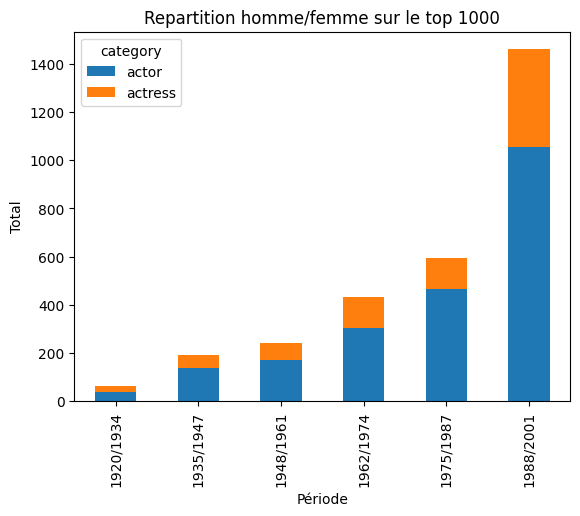

In [ ]:
# Graphique
repartitionHM_year.reset_index(level=0, inplace=True)
repartitionHM_year['startYear'] = pd.to_numeric(repartitionHM_year['startYear'], errors='coerce')

repartitionHM_year['Intervalle'] = pd.cut(repartitionHM_year['startYear'], bins = 6)

repartitionHM_year2 = repartitionHM_year.groupby('Intervalle')['actor', 'actress'].sum().reset_index()
years = ['1920/1934', '1935/1947','1948/1961', '1962/1974', '1975/1987', '1988/2001']
repartitionHM_year2['Intervalle'] = repartitionHM_year2['Intervalle'].replace(years, inplace=True)
repartitionHM_year2['periode'] = ['1920/1934', '1935/1947','1948/1961', '1962/1974', '1975/1987', '1988/2001']
repartitionHM_year2.drop('Intervalle', axis=1, inplace=True)
repartitionHM_year2
repartitionHM_year2.plot.bar(x='periode', stacked=True)
plt.xlabel('Période')
plt.ylabel('Total')
plt.title('Repartition homme/femme sur le top 1000')

**Interprétation de KPI**

*   Nous permet d'observer les évolutions de la proportion des acteurs et des actrices dans les films en fonction du temps
*   Depuis 1920, le nombre total d'acteurs est significativement plus élevé que le nombre total d'actrices, avec un pourcentage moyen d'acteurs d'environ 74% et d'actrices d'environ 26%.



#**5. Répartition Hommes & Femmes par genres de film sur le top 1000**

**Syntaxe & table**

In [ ]:
#répartition Homme/Femme par genre sur le top 1000
repartitionHM_genre = top_film_acteur_exp.pivot_table(index='genres', columns = 'category', values = 'tconst', aggfunc= 'count', margins = True)
repartitionHM_genre['Pourcentage_H'] = repartitionHM_genre['actor'].div(repartitionHM_genre['All']) * 100
repartitionHM_genre['Pourcentage_H'] = repartitionHM_genre['Pourcentage_H'].round()
repartitionHM_genre['Pourcentage_F'] = 100 - repartitionHM_genre['Pourcentage_H']
repartitionHM_genre

category,actor,actress,All,Pourcentage_H,Pourcentage_F
genres,,,,,
Action,177,55,232,76.0,24.0
Adventure,216,68,284,76.0,24.0
Animation,68,36,104,65.0,35.0
Biography,71,21,92,77.0,23.0
Comedy,234,83,317,74.0,26.0
Crime,211,61,272,78.0,22.0
Drama,474,175,649,73.0,27.0
Family,68,38,106,64.0,36.0
Fantasy,66,30,96,69.0,31.0


**Interprétation de KPI**


*   Ce KPI nous permet d'évaluer le pourcentage d'acteurs et d'actrices en fonction de type de films

*   Dans tous les genres de films, on trouve plus d'acteurs que les actrices, particulièrement dans les films "Western", "War", "Sci-Fi" et "Musical"

*   Au total, la proportion acteurs/actrices = 70% et 30%






# **6. Evolution de durée du film entre 1894 et 2023**

**Synthaxe et graphique**

In [ ]:
# selection des films réalisés avant 2024
runtime_selected = titre.loc[titre['startYear']<2024]
# Regrouper le runtime moy et startYear
evolution_temps = runtime_selected.groupby(['startYear'])['runtimeMinutes'].mean().reset_index()
evolution_temps['runtimeMinutes'] = round(evolution_temps['runtimeMinutes'],2)
# graphique
evolution_runtime = px.scatter(data_frame=evolution_temps, x='startYear', y='runtimeMinutes',
                title='Evolution de durée des films entre 1894 et 2023',
                labels={'startYear':'', 'runtimeMinutes':'Durrée du film (en Min)'})
evolution_runtime.update_layout(title_x = 0.5)
evolution_runtime.show()

**Interprétation de KPI**

* La graphique nous permet d'observer la durée moyenne des films fuit à mesure du temps
* Vers les années 1900, la durée du film était plus dispersée
* Depuis 1960, la durée du film est devenu plus homogène
* A partir de l'année 2010 la durée de film monte une tendance d'augmentation


# **7. La durée, la note et la popularité en fonction des genres de films(Pour Top 1000 films)**

**Syntaxe & graphique**

In [ ]:
# grouper genres de filme et durée
durée_top_1000 = best_film_explode.groupby(['genres'])['runtimeMinutes'].mean().sort_values(ascending=False).reset_index()
durée_top_1000['runtimeMinutes'] = round(durée_top_1000['runtimeMinutes'],2)
# grouper genre de film et note
note_top_1000 = best_film_explode.groupby(['genres'])['averageRating'].mean().sort_values(ascending=False).reset_index()
note_top_1000['averageRating'] = round(note_top_1000['averageRating'],2)
# grouper genre de film et nombre de vote
nb_vote_top_1000 = best_film_explode.groupby(['genres'])['numVotes'].sum().sort_values(ascending=False).reset_index()
nb_vote_top_1000['numVotes'] = round(nb_vote_top_1000['numVotes'],0)
# merge des tables
note_dure_top_1000 = pd.merge(durée_top_1000, note_top_1000, on='genres', how='inner')
note_dure_nb_top_1000 = pd.merge(note_dure_top_1000, nb_vote_top_1000, on='genres', how='inner')

In [ ]:
# graphique pour le genre de film en fonction de durée, de note et de nombre de vote
# création de liste de couleurs
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'teal', 'gray', 'magenta',
      'yellow', 'cyan', 'lime', 'indigo', 'silver', 'gold', 'olive', 'navy', 'maroon', 'aqua']
top_1000_dure_note_nbvote = px.scatter(data_frame=note_dure_nb_top_1000,
                    y='averageRating',
                    x='runtimeMinutes',
                    color='genres',
                    color_discrete_sequence=colors,
                    hover_name='genres',
                    size='numVotes',
                    size_max=25,
                    title='Durée, Note moyenne et Popularité en fonction des genres des films',
                    labels={'runtimeMinutes':'Durée (en Minutes)', 'averageRating':'Note moyenne'})
top_1000_dure_note_nbvote.update_layout(title_x = 0.5)
top_1000_dure_note_nbvote.update_layout(showlegend=False)
# Rajouter des étiquettes de données
for i, row in note_dure_nb_top_1000.iterrows():
    top_1000_dure_note_nbvote.add_annotation(x=row['runtimeMinutes'],
                        y=row['averageRating'],
                        text=row['genres'], showarrow=False,
                        font=dict(size=10),
                        xanchor='left', xshift=15)
top_1000_dure_note_nbvote.show()

**Interprétation de KPI**

* L'axe x représente la durée moyenne des genres de films, tandis que l'axe y correspond à la note moyenne des genres de films
* La taille de chaque point représente le nombre de vote, qui nous permet d'estimer la popularité d'un genre de film
* La plupart de film est entre 120 et 130 minutes
* Sur la graphique, nous observons que le "Drama", "Aventure" et "Action" sont les genres les plus populaire
* Nous observons aussi que les genres "War", "Western" et "Music" sont les 3 genres qui sont marginale mais avec les meilleurs notes moyennes
* Le film noir et blanc : le type est moins populaire, mais avec une très bonne note et une durée courte





#**8. Note moyenne des catégories**

**Syntaxe & graphique**

In [ ]:
# Note moyenne des catégories

# Jointure entre titre et notes
titre_notes = pd.merge(titre, note, how="left", left_on='tconst', right_on='tconst')

# Filtre sur certaines catégories
titre_notes = titre_notes[titre_notes['genres'].isin(['Adult','Game-Show','Music','News','Reality-TV','Short','Talk-Show']) == False]

# Filtre sur la date
#titre_AFERR = titre_AFERR[titre_AFERR['startYear'] != '\\N']
#titre_AFERR['startYear'] = pd.to_datetime(titre_AFERR['startYear'], format='%Y')
#titre_AFERR = titre_AFERR.loc[titre_AFERR['startYear'].dt.year >= 1980]

# Création d'une colonne avec la note moyenne de chaque genre
col_averageRating = titre_notes.pivot_table(values = 'averageRating', index = 'genres', aggfunc = 'mean').sort_values(by= 'genres').round(2)

# Création d'une colonne avec le nombre de votes (en millions)
col_numVotes = titre_notes.pivot_table(values = 'numVotes', index = 'genres', aggfunc = 'sum').sort_values(by= 'genres')
col_numVotes = round(col_numVotes['numVotes'] / 1000000, 1)

# Création d'un tableau croisé dynamique avec les colonnes notes moyenne et nombre de votes
classement = pd.merge(col_averageRating, col_numVotes, how="left", left_on='genres', right_on='genres')
classement = classement.sort_values(by= 'averageRating', ascending = False)

# Renommage des colonnes et affichage du classement final
colnames  = list(classement.columns)
colnames[0] = "Note moyenne"
colnames[1] = "Nb votes (en millions)"
classement.columns = colnames
classement = classement.reset_index()
classement

,genres,Note moyenne,Nb votes (en millions)
0,Documentary,7.23,14.5
1,Biography,6.97,68.8
2,History,6.81,29.1
3,Sport,6.62,17.0
4,Film-Noir,6.47,3.9
5,War,6.42,23.2
6,Animation,6.36,62.1
7,Drama,6.24,530.6
8,Family,6.19,47.7
9,Musical,6.17,9.8


In [ ]:
# Partie graphique

import plotly.graph_objects as go

colors = ['lightblue', 'green', 'lightgrey', 'orange', 'black', 'darkred', 'royalblue', 'slategrey', 'hotpink', 'mediumaquamarine',
          'rosybrown', 'red', 'blueviolet', 'cornflowerblue', 'plum', 'gold', 'sienna', 'orangered', 'maroon', 'slateblue', 'darkcyan']

# Création des traces pour chaque genre avec une couleur de marqueur différente
traces = []
for i, genre in enumerate(classement['genres']):
    trace = go.Scatter(
        x=[classement['Nb votes (en millions)'][i]],
        y=[classement['Note moyenne'][i]],
        mode='markers+text',  # Ajout du mode 'text' pour afficher le texte à côté des marqueurs
        marker=dict(
            symbol='circle',
            size=15,
            color=colors[i]
        ),
        text=[genre],
        hovertext=[f'Genre: {genre}<br>Note moyenne: {classement["Note moyenne"][i]}<br>Nb votes (en millions): {classement["Nb votes (en millions)"][i]}'],

        textposition='bottom center',
        name=genre
    )
    traces.append(trace)

# Création de la figure
fig = go.Figure(data=traces)

# Mise en forme du layout
fig.update_layout(
    title='Classement des genres par note moyenne et nombre de votes',
    xaxis=dict(title='Nombre de Votes (millions)'),
    yaxis=dict(title='Note moyenne'),
    legend_title_text='Genres',
    height=700,
    width=1400
)

# Affichage du graphique
fig.show()

**Interprétation de KPI**

* Les genres les mieux notés ne sont pas forcément les plus populaires
* Les genres ayant un rapport équilibré entre le nombre de vote et la note moyenne sont : Crime et Romance
* Les genres les plus populaires sont : Drama, Action et Comedy
* Les genres les mieux notés sont : Documentary, Biography et History

  => Sur cette dernière observation :
on peut en déduire que les gens apprécient beaucoup les films relatif aux faits de la vie réelle au travers des documentaires, des films hostoriques où diverses biographies


# **9. Analyse des 10 genres les mieux notés par période de 1980 à nos jours**

In [ ]:
classement = classement.nlargest(10, 'Note moyenne')
classement

,genres,Note moyenne,Nb votes (en millions)
0,Documentary,7.23,14.5
1,Biography,6.97,68.8
2,History,6.81,29.1
3,Sport,6.62,17.0
4,Film-Noir,6.47,3.9
5,War,6.42,23.2
6,Animation,6.36,62.1
7,Drama,6.24,530.6
8,Family,6.19,47.7
9,Musical,6.17,9.8



Afin d'affiner notre analyse sur les dernières tendances, nous avons donc décidé d'analyser l'évolution des 10 genres les mieux notés.

Nous nous sommes tout d'abord posés cette question :

**Les genres les mieux notés sont ils identiques selon la période ?**

Nous avons pour cela comparé le classement des genres selon la période :


Genres les mieux notés sur toute la base (De 1850 à nos jours)

VS

Genres les mieux notés de 1980 à nos jours


**Conclusion :**

Le classement est globalement le même sauf pour 2 genres :

*   Le genre **Film-Noir** était bien noté avant les années 2000 mais ce n'est plus le cas depuis ces 20 dernières années. Nous constatons également que cette catégorie de films n'avait pas un nombre de votes significatif par rapport aux autres genres ("seulement" 3,9 millions de votes)
*   Le genre **Romance** est davantage tendance depuis les 20 dernières années par rapport à la période avant les années 2000. Il est même classé 2e en nombre de votes après le genre Drama

**Interprétation du KPI : Genres les mieux notés sur toute la base (De 1980 à nos jours)**

**Cette étude est intéressante car elle permet de faire ressortir les genres les mieux notés de toute la base de données mais qui ne sont pas forcément les genres appartenant aux films les plus populaires**

*Pour rappel les genres les plus populaires du top 1000 films sont Drama, Comedy, Action, Adventure et Crime*

Les oberservations que l'on peut tirer de ce classement :


- L'écart entre les notes moyennes de chaque genre est plutôt faible


- Les genres les mieux notés ne sont pas forcément ceux qui ont le plus grand nombre de votes (donc les plus populaires)

- Le genre qui combine la meilleure note et le plus grand nombre de votes est Biography



## Courbes de tendance


In [ ]:
#titre = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep = '\t', dtype={'isAdult': str}).query('titleType == "movie"')
#note = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t')

titre_par_genre = titre_depuis2010[titre_depuis2010['genres'].isin(['Documentary', 'Biography', 'History', 'Sport', 'War', 'Musical', 'Animation', 'Drama', 'Family', 'Romance']) == True]

# Filtrage sur les dates
#titre_par_genre = titre_par_genre[titre_par_genre['startYear'].isin(['\\N']) == False]
#titre_par_genre['startYear'] = pd.to_datetime(titre_par_genre['startYear'], format='%Y')

#titre_par_genre = titre_par_genre.loc[(titre_par_genre['startYear'] >= 2010)]


# Nettoyage
#titre_par_genre['genres'] = titre_par_genre['genres'].apply(lambda x: x.split(','))
#titre_par_genre = titre_par_genre.explode('genres')

# Jointure entre titre et notes
titre_par_genre = pd.merge(titre_par_genre, note, how="left", left_on='tconst', right_on='tconst')

# Création du tableau croisé dynamique
genres = pd.pivot_table(titre_par_genre, values='averageRating', index='startYear', columns='genres', aggfunc=lambda x: round(x.mean(), 2), fill_value=0)

# Graphique depuis 2010
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

genres_df = pd.DataFrame(genres)

fig = go.Figure()

# Ajouter les traces (une pour chaque genre)
for genre in genres_df.columns:
    fig.add_trace(go.Scatter(
        x=genres_df.index,
        y=genres_df[genre],
        mode='lines',
        name=genre
    ))

fig.update_layout(
    title="Evolution depuis 2010 de la note moyenne des genres les mieux notés",
    xaxis=dict(title="Années"),
    yaxis=dict(title="Note moyenne"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    height=700,
    width=1400
)

fig.update_yaxes(range=[5, 9])

pio.show(fig)

**Interprétation du graphique sur l'évolution de la note des genres depuis 2010 :**

*   Le genre **Documentary** est une valeur sûre car sa courbe est globalement au dessus des autres
*   Les genres qui ont la plus forte progression ces dernières années sont
 **History**, **Musical** et **Biography** (courbes bleu, rose et rouge) avec une forte progression pour **History** par rapport aux autres depuis 2022

    => Il y'a eu une inversion de tendance vers 2019 entre le genre Biography et Musical (courbes bleu et rose) : Le genre Biography a performé par rapport à Musical entre 2019 et 2021, ce qui n'était pas arrivé depuis de nombreuses années

*   Enfin les genres **sports** et **war** qui sont pourtant dans les 5 genres ayant la meilleure moyenne entre 2000 et aujourd'hui (cf tableau précédent), ne performent pas autant que les autres genres et leur forte moyenne est due à des pics ponctuels : 2017 et 2022 pour le sport, 2016 pour war

**Syntaxe & graphique**

In [ ]:
titre.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,\N,45.0,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,\N,100.0,Documentary
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,\N,100.0,News
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,\N,100.0,Sport
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,\N,70.0,Action


#**10.Evolution des genres ces 10 dernières années**


In [ ]:
#@title
#je créé mon pivot table
titre_filtres = titre[(titre.startYear == 2010) | (titre.startYear == 2022)].pivot_table(columns='startYear',
                                                                                         values = 'tconst',
                                                                                         index = 'genres',
                                                                                         aggfunc = 'count')
#je transforme mon pivot table en dataframe
titre_filtres = titre_filtres.reset_index()
#je renomme mes colonnes
colnames  = list(titre_filtres.columns)
colnames[1] = "Année 2010"
colnames[2] = "Année 2022"
titre_filtres.columns = colnames
#je filtre sur 2012 et 2022
titre_filtres['Pourcentage'] = (titre_filtres['Année 2022'] - titre_filtres['Année 2010']) / titre_filtres['Année 2010'] * 100
#je sort values
titre_filtres = titre_filtres.sort_values(by = 'Pourcentage', ascending = False)
titre_filtres = titre_filtres.reset_index()
titre_filtres = titre_filtres.drop(['index'], axis=1)

evol_genre = pd.merge(classement, titre_filtres, how="outer", left_on='genres', right_on='genres')
evol_genre = evol_genre[['genres', 'Année 2010',
       'Année 2022', 'Pourcentage']]

def highlight_rows(row):
    if row['Pourcentage'] > 41:
        return ['background-color: green'] * len(row)
    elif row['Pourcentage'] < -17:
        return ['background-color: red'] * len(row)
    return [''] * len(row)

# Apply the style function to the DataFrame
styled_df = evol_genre.style.apply(highlight_rows, axis=1)

# Display the styled DataFrame
styled_df


,genres,Année 2010,Année 2022,Pourcentage
0,Documentary,3822.000000,3821.000000,-0.026164
1,Biography,681.000000,400.000000,-41.262849
2,History,533.000000,267.000000,-49.906191
3,Sport,157.000000,185.000000,17.834395
4,Film-Noir,nan,nan,nan
5,War,120.000000,98.000000,-18.333333
6,Animation,198.000000,275.000000,38.888889
7,Drama,4008.000000,4557.000000,13.697605
8,Family,432.000000,376.000000,-12.962963
9,Musical,125.000000,120.000000,-4.000000
